In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import os


In [26]:
#load 2 examples
tower = np.load('data/npy/full_numpy_bitmap_The Eiffel Tower.npy')
clock = np.load('data/npy/full_numpy_bitmap_alarm clock.npy')
tower = np.load('data/npy/full_numpy_bitmap_The Eiffel Tower.npy')
clock = np.load('data/npy/full_numpy_bitmap_alarm clock.npy')
tower = np.load('data/npy/full_numpy_bitmap_The Eiffel Tower.npy')
clock = np.load('data/npy/full_numpy_bitmap_alarm clock.npy')
tower = np.load('data/npy/full_numpy_bitmap_The Eiffel Tower.npy')
clock = np.load('data/npy/full_numpy_bitmap_alarm clock.npy')
tower = np.load('data/npy/full_numpy_bitmap_The Eiffel Tower.npy')
clock = np.load('data/npy/full_numpy_bitmap_alarm clock.npy')
tower = np.load('data/npy/full_numpy_bitmap_The Eiffel Tower.npy')
clock = np.load('data/npy/full_numpy_bitmap_alarm clock.npy')

In [27]:
files = os.listdir('./data/npy')
files.sort()
files

['.DS_Store',
 'full_numpy_bitmap_The Eiffel Tower.npy',
 'full_numpy_bitmap_airplane.npy',
 'full_numpy_bitmap_alarm clock.npy',
 'full_numpy_bitmap_angel.npy',
 'full_numpy_bitmap_banana.npy',
 'full_numpy_bitmap_baseball bat.npy',
 'full_numpy_bitmap_campfire.npy',
 'full_numpy_bitmap_house.npy',
 'full_numpy_bitmap_ice cream.npy',
 'full_numpy_bitmap_teddy-bear.npy']

In [15]:
file_list = []
for i in range(1,11):
    print(files[i])
    file_list.append(files[i])

full_numpy_bitmap_The Eiffel Tower.npy
full_numpy_bitmap_airplane.npy
full_numpy_bitmap_alarm clock.npy
full_numpy_bitmap_angel.npy
full_numpy_bitmap_banana.npy
full_numpy_bitmap_baseball bat.npy
full_numpy_bitmap_campfire.npy
full_numpy_bitmap_house.npy
full_numpy_bitmap_ice cream.npy
full_numpy_bitmap_teddy-bear.npy


In [16]:
file_list

['full_numpy_bitmap_The Eiffel Tower.npy',
 'full_numpy_bitmap_airplane.npy',
 'full_numpy_bitmap_alarm clock.npy',
 'full_numpy_bitmap_angel.npy',
 'full_numpy_bitmap_banana.npy',
 'full_numpy_bitmap_baseball bat.npy',
 'full_numpy_bitmap_campfire.npy',
 'full_numpy_bitmap_house.npy',
 'full_numpy_bitmap_ice cream.npy',
 'full_numpy_bitmap_teddy-bear.npy']

In [49]:
tower = np.load('data/npy/full_numpy_bitmap_The Eiffel Tower.npy')
airplane = np.load('data/npy/full_numpy_bitmap_airplane.npy')
clock = np.load('data/npy/full_numpy_bitmap_alarm clock.npy')
angel = np.load('data/npy/full_numpy_bitmap_angel.npy')
banana = np.load('data/npy/full_numpy_bitmap_banana.npy')
baseball_bat = np.load('data/npy/full_numpy_bitmap_baseball bat.npy')
campfire = np.load('data/npy/full_numpy_bitmap_campfire.npy')
house = np.load('data/npy/full_numpy_bitmap_house.npy')
ice_cream = np.load('data/npy/full_numpy_bitmap_ice cream.npy')
teddy_bear = np.load('data/npy/full_numpy_bitmap_teddy-bear.npy')


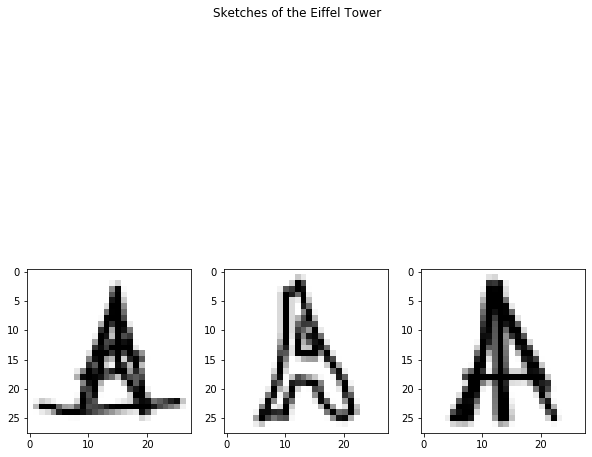

In [81]:
plt.subplots(3,3, figsize = (10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(tower[i].reshape(28,28), cmap ='Greys')
plt.suptitle('Sketches of the Eiffel Tower')
plt.show()

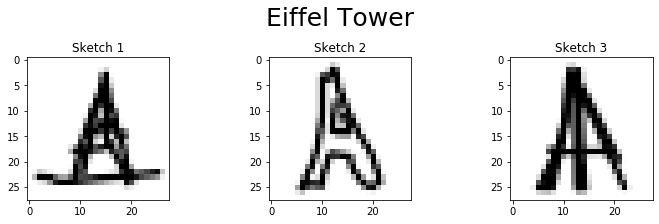

In [101]:
fig, axs = plt.subplots(1, 3, constrained_layout=True)

axs[0].imshow(tower[0].reshape(28,28), cmap ='Greys')
axs[0].set_title('Sketch 1')
axs[0].set_ylabel
ax1.set_xlim([0, 5])
ax1.set_ylim([0, 5])

fig.suptitle('Eiffel Tower', fontsize=25)
fig.set_figheight(3)
fig.set_figwidth(10)

axs[1].imshow(tower[1].reshape(28,28), cmap ='Greys')
axs[1].set_title('Sketch 2')

axs[2].imshow(tower[2].reshape(28,28), cmap ='Greys')
axs[2].set_title('Sketch 3')

plt.show()

In [51]:
#take 100 samples
tower_100 = tower[:100,:]
airplane_100 = airplane[:100,:]
clock_100 = clock[:100,:]
angel_100 = clock[:100,:]
banana_100 = clock[:100,:]
baseball_bat_100 = clock[:100,:]
campfire_100 = clock[:100,:]
house_100 = clock[:100,:]
ice_cream_100 = clock[:100,:]
teddy_bear_100 = clock[:100,:]

In [65]:
train_acc = []
test_acc = []
sample_size_list = range(1,6)
sample_size = []

for i in sample_size_list:
    sample_size.append(10**i)
    
    tower_100 = tower[:10**i,:]
    airplane_100 = airplane[:10**i,:]
    clock_100 = clock[:10**i,:]
    angel_100 = clock[:10**i,:]
    banana_100 = clock[:10**i,:]
    baseball_bat_100 = clock[:10**i,:]
    campfire_100 = clock[:10**i,:]
    house_100 = clock[:10**i,:]
    ice_cream_100 = clock[:10**i,:]
    teddy_bear_100 = clock[:10**i,:]

    y = []
    for i in range(10):
        for j in range(tower_100.shape[0]):
            y.append(i)

    X = np.concatenate((tower_100,airplane_100,clock_100, angel_100, banana_100, baseball_bat_100, campfire_100,
                       house_100,ice_cream_100,teddy_bear_100))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y, random_state = 1)
    model_lr = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 100,random_state = 0)
    model_lr.fit(X_train,y_train)

    train_acc.append(model_lr.score(X_train,y_train))
    test_acc.append(model_lr.score(X_test,y_test))



/Users/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Accuracy')

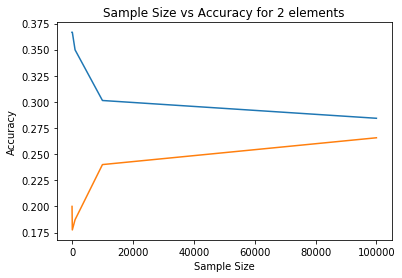

In [66]:
plt.figure()
plt.plot(sample_size, train_acc)
plt.plot(sample_size, test_acc)
plt.title('Sample Size vs Accuracy for 10 elements')
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')

In [102]:
test_acc

[0.2, 0.1775, 0.18725, 0.240025, 0.2656775]

In [69]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [103]:
train_acc = []
test_acc = []
sample_size_list = range(1,6)
sample_size = []

for i in sample_size_list:
    sample_size.append(10**i)
    
    tower_100 = tower[:10**i,:]
    airplane_100 = airplane[:10**i,:]
    clock_100 = clock[:10**i,:]

    y = []
    for i in range(3):
        for j in range(tower_100.shape[0]):
            y.append(i)

    X = np.concatenate((tower_100,airplane_100,clock_100))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y, random_state = 1)
    model_lr = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 100,random_state = 0)
    model_lr.fit(X_train,y_train)

    train_acc.append(model_lr.score(X_train,y_train))
    test_acc.append(model_lr.score(X_test,y_test))
    
    


/Users/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Accuracy')

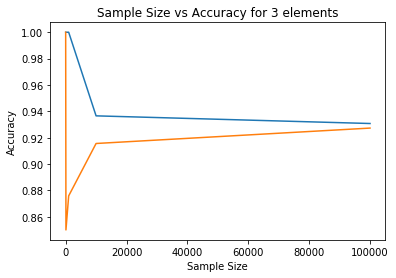

In [104]:
plt.figure()
plt.plot(sample_size, train_acc)
plt.plot(sample_size, test_acc)
plt.title('Sample Size vs Accuracy for 3 elements')
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')

In [105]:
train_acc = []
test_acc = []
sample_size_list = range(1,6)
sample_size = []

for i in sample_size_list:
    sample_size.append(10**i)
    
    tower_100 = tower[:10**i,:]
    airplane_100 = airplane[:10**i,:]
    clock_100 = clock[:10**i,:]
    angel_100 = clock[:10**i,:]


    y = []
    for i in range(4):
        for j in range(tower_100.shape[0]):
            y.append(i)

    X = np.concatenate((tower_100,airplane_100,clock_100,angel_100))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y, random_state = 1)
    model_lr = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 100,random_state = 0)
    model_lr.fit(X_train,y_train)

    train_acc.append(model_lr.score(X_train,y_train))
    test_acc.append(model_lr.score(X_test,y_test))
    

/Users/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Accuracy')

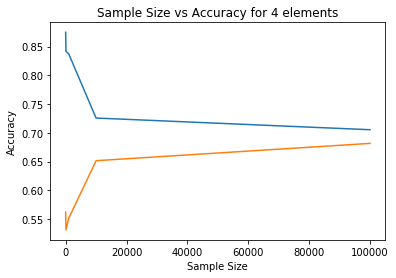

In [108]:
plt.figure()
plt.plot(sample_size, train_acc)
plt.plot(sample_size, test_acc)
plt.title('Sample Size vs Accuracy for 4 elements')
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')



In [107]:
test_acc

[0.5625, 0.53125, 0.55125, 0.651625, 0.68173125]

In [ ]:
train_acc = []
test_acc = []
sample_size_list = range(1,6)
sample_size = []

for i in sample_size_list:
    sample_size.append(10**i)
    
    tower_100 = tower[:10**i,:]
    airplane_100 = airplane[:10**i,:]
    clock_100 = clock[:10**i,:]
    angel_100 = clock[:10**i,:]


    y = []
    for i in range(4):
        for j in range(tower_100.shape[0]):
            y.append(i)

    X = np.concatenate((tower_100,airplane_100,clock_100,angel_100))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y, random_state = 1)
    model_lr = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 100,random_state = 0)
    model_lr.fit(X_train,y_train)

    train_acc.append(model_lr.score(X_train,y_train))
    test_acc.append(model_lr.score(X_test,y_test))